In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import visualizations as vis
import importlib
importlib.reload(vis)

%reload_ext autoreload
%autoreload 2


In [3]:
data = pd.read_csv('./data/2022-chp-pud.csv')
data = data.dropna(subset=['ID'])

borough_info = data.iloc[0:6]
community_info = data.iloc[6:]

communities_column = 'Name'
district = 'East Harlem'
parameter_1 = 'Self_Rep_Health'
parameter_2 = 'Fruit_Veg'
parameters = [parameter_1, parameter_2]

In [4]:
all_stats = []

for parameter in parameters:
    # Identify the row that corresponds to the given community. From that row, grab the value corresponding to the desired statistic.
    borough = community_info.loc[community_info[communities_column] == district]['Borough']
    local_stat = community_info.loc[community_info[communities_column] == district][parameter].values[0]
    borough_stat = borough_info.loc[borough_info[communities_column] == borough.values[0]][parameter].values[0]
    city_stat = borough_info.loc[borough_info[communities_column] == 'NYC'][parameter].values[0]

    names = ['NYC', borough.values[0], district]
    stats = [city_stat, borough_stat, local_stat]
    # names = [district, borough.values[0], 'NYC']
    # stats = [local_stat, borough_stat, city_stat]
        
    print(stats, names)
    print(city_stat)

    all_stats.append(stats)


[78.4, 82.3, 76.2] ['NYC', 'Manhattan', 'East Harlem']
78.4
[89.0, 90.0, 82.0] ['NYC', 'Manhattan', 'East Harlem']
89.0


([78.4, 82.3, 76.2], 'How residents feel about their own health as "good"')
([89.0, 90.0, 82.0], 'At least one serving of fruits or vegetables per day')


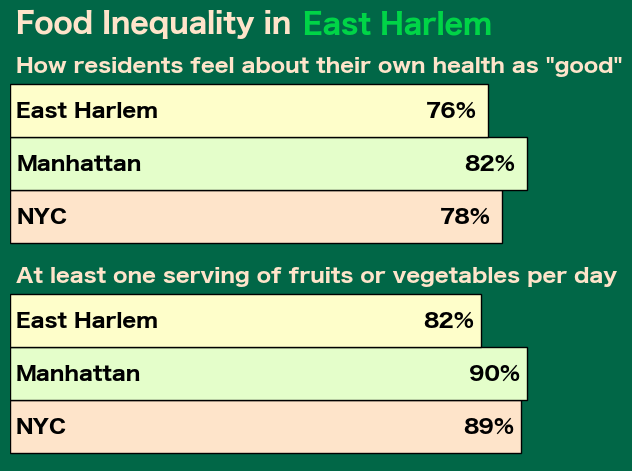

In [284]:
# https://www.geeksforgeeks.org/how-to-make-dropdown-menus-in-plotly/
# https://www.python-graph-gallery.com/5-control-width-and-space-in-barplots
# https://www.geeksforgeeks.org/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib/
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-on-horizontal-bars
# https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/

x_pos = [0, 0.5, 1]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), facecolor = '#016747') 

for i, param in enumerate(zip(all_stats, ['How residents feel about their own health as "good"', 'At least one serving of fruits or vegetables per day'])):
    print(param)
    bars = ax[i].barh(x_pos, width = param[0], height = 0.5, color = ['#fee4ca', '#e4feca', '#fefeca'], edgecolor = 'black', linewidth = 1)
    # Create names on the x-axis

    ax[i].set_yticks(x_pos, names)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].get_xaxis().set_ticks([])
    plt.setp(ax[i].get_xticklabels(), visible=False)

    # get rid of y ticks
    ax[i].get_yaxis().set_ticks([])
    plt.setp(ax[i].get_yticklabels(), visible=False)

    # ax[i].set_title(f"Food inequality in {district}", fontname = "Hiragino Sans", fontweight="bold", color = '#fefeca', fontsize = 18)
    # ax[i].set_title(param, fontname = "Hiragino Sans", fontweight="bold", color = '#fefeca', fontsize = 18)
    ax[i].text(1, 1.35, param[1], fontsize = 15, color = '#fee4ca', fontname = "Hiragino Sans", fontweight="bold")

    ax[i].set_facecolor('#016747')

    if False:
        ax[i].bar_label(bars, fmt = '%g%%' ,padding = 2)
        _ = ax[i].vlines(x=[city_stat], ymin=-0.5, ymax= 1, colors='r')
        plt.text(city_stat + 1, -0.5, f'NYC: {city_stat}%', fontsize = 10, color = 'r')

    for j in range(len(names)):
        # Add area names to bars
        ax[i].text(1, x_pos[j] - 0.07, f'{names[j]}', fontsize = 15, color = 'black', fontname = "Hiragino Sans", fontweight="bold")
        # Add percentages to bars ->
        ax[i].text(param[0][j] - 10, x_pos[j] - 0.07, f'{round(param[0][j])}%', fontsize = 15, color = 'black', fontname = "Hiragino Sans", fontweight="bold")

# plt.suptitle(f"Food inequality in {district}", x = 0.52, y = 1.01, fontname = "Hiragino Sans", fontweight="bold", color = '#fee4ca', fontsize = 20)
plt.text(1 , 3.71, "Food Inequality in ", fontname = "Hiragino Sans", fontweight="bold", color = '#fee4ca', fontsize = 20)
plt.text(51 , 3.71, f"{district}", fontname = "Hiragino Sans", fontweight="bold", color = '#00d447', fontsize = 20)

plt.show()

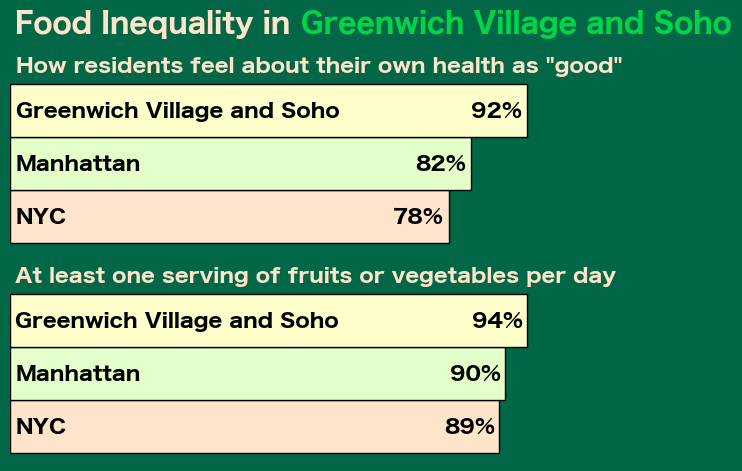

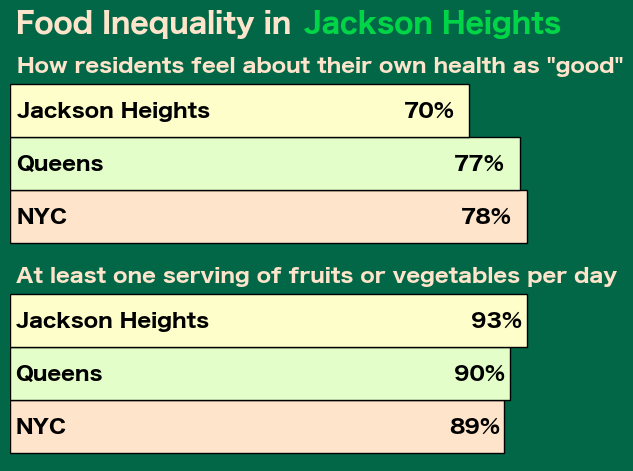

In [16]:
vis.plot_inequality(community_info, borough_info, district_name = "Greenwich Village and Soho")
vis.plot_inequality(community_info, borough_info, district_name = "Jackson Heights")

Greenwich Village and Soho
Lower East Side and Chinatown
Clinton and Chelsea
Midtown
Stuyvesant Town and Turtle Bay
Upper West Side
Upper East Side
Morningside Heights and Hamilton Heights
Central Harlem
East Harlem
Washington Heights and Inwood
Mott Haven and Melrose
Hunts Point and Longwood
Morrisania and Crotona
Highbridge and Concourse
Fordham and University Heights
Belmont and East Tremont
Kingsbridge Heights and Bedford
Riverdale and Fieldston
Parkchester and Soundview
Throgs Neck and Co-op City
Morris Park and Bronxdale
Williamsbridge and Baychester


/Users/bisramr/Documents/Cooper Stuff/ML-for-SocialGood/data-sci/visualizations.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), facecolor = '#016747')


Greenpoint and Williamsburg
Fort Greene and Brooklyn Heights
Bedford Stuyvesant
Bushwick
East New York and Starrett City
Park Slope and Carroll Gardens
Sunset Park
Crown Heights and Prospect Heights
South Crown Heights and Lefferts Gardens
Bay Ridge and Dyker Heights
Bensonhurst
Borough Park
Coney Island
Flatbush and Midwood
Sheepshead Bay
Brownsville
East Flatbush
Flatlands and Canarsie
Long Island City and Astoria
Woodside and Sunnyside
Jackson Heights
Elmhurst and Corona
Ridgewood and Maspeth
Rego Park and Forest Hills
Flushing and Whitestone
Hillcrest and Fresh Meadows
Kew Gardens and Woodhaven
South Ozone Park and Howard Beach
Bayside and Little Neck
Jamaica and Hollis
Queens Village
Rockaway and Broad Channel
St. George and Stapleton
South Beach and Willowbrook
Tottenville and Great Kills


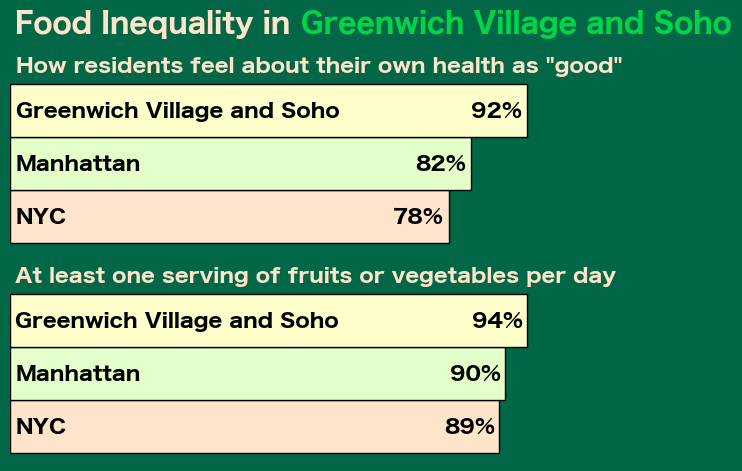

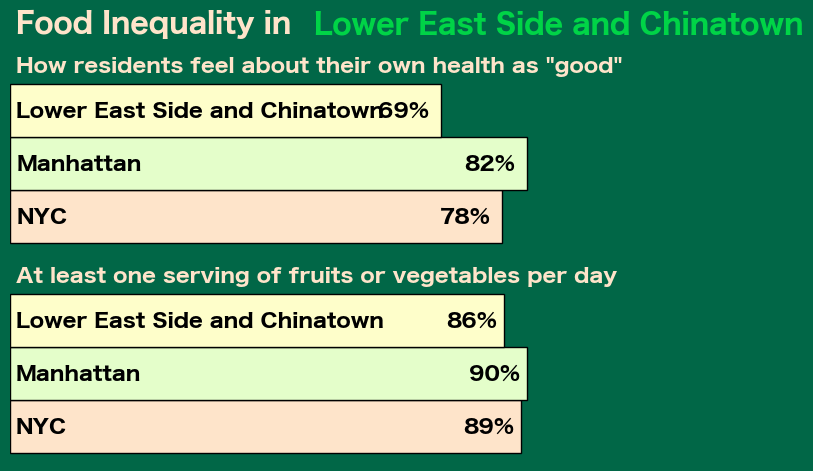

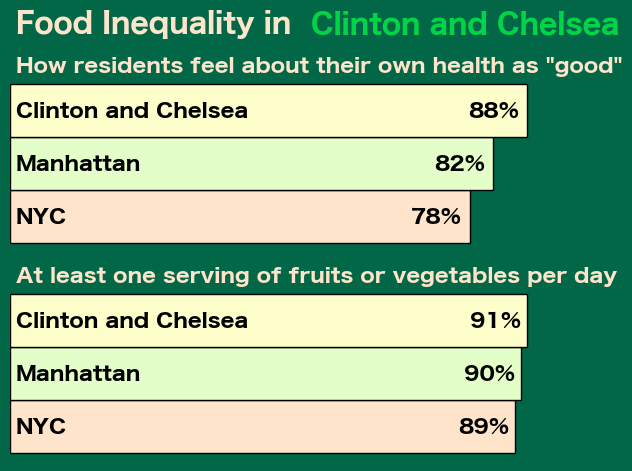

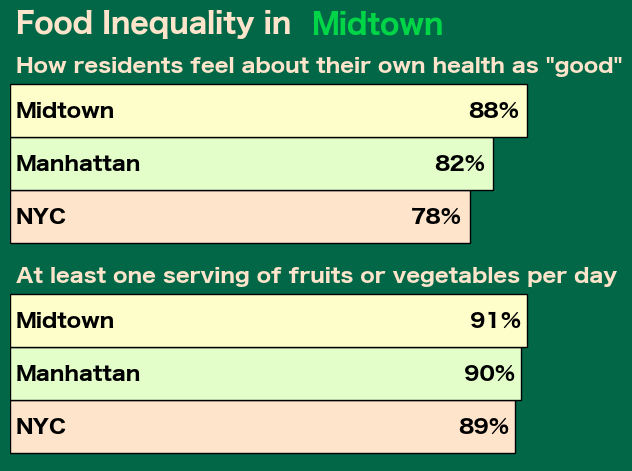

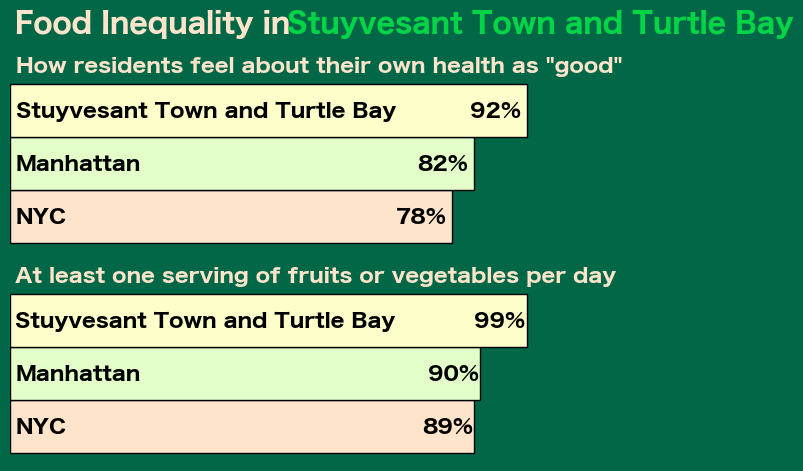

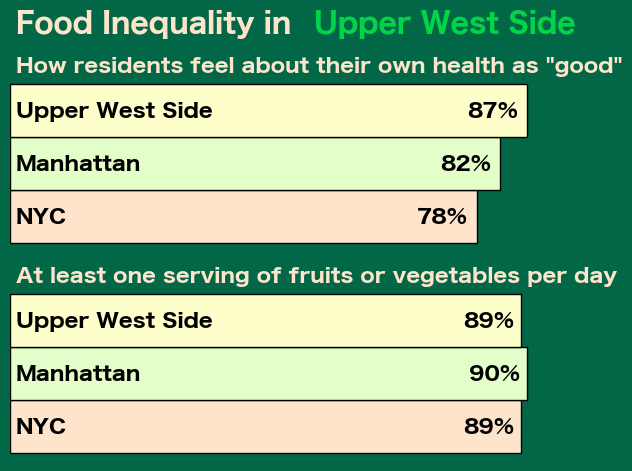

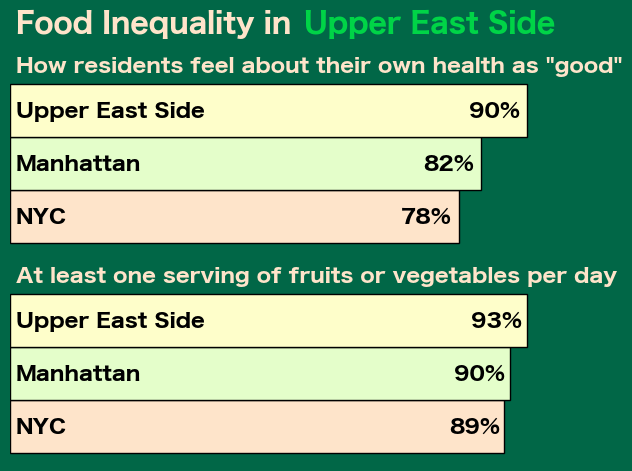

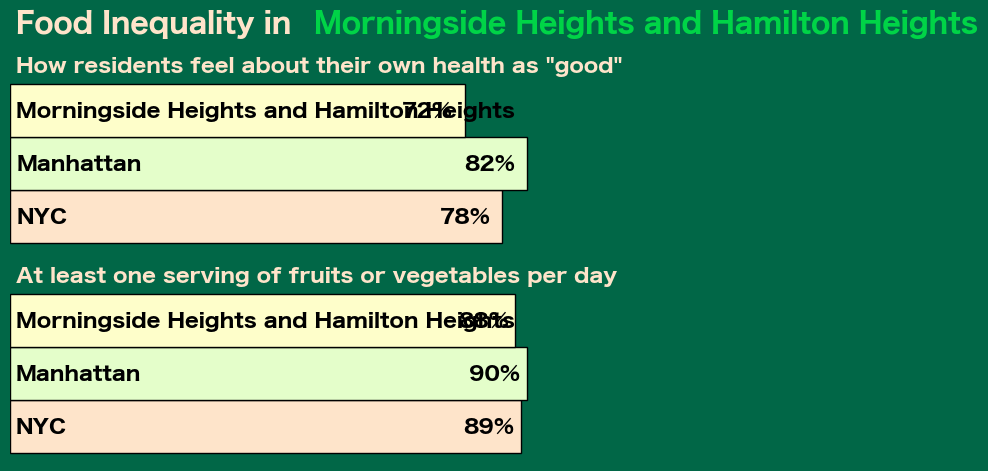

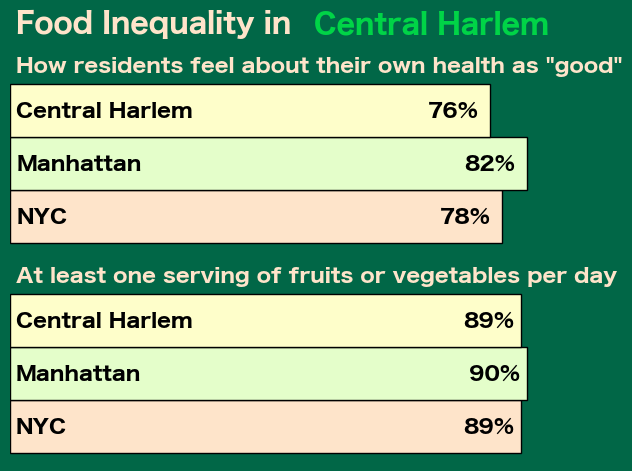

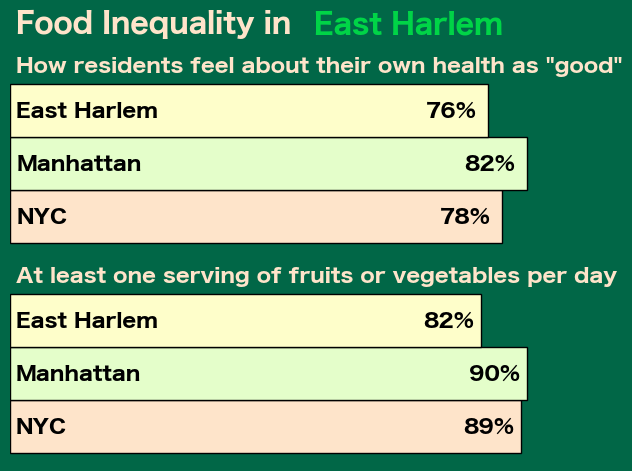

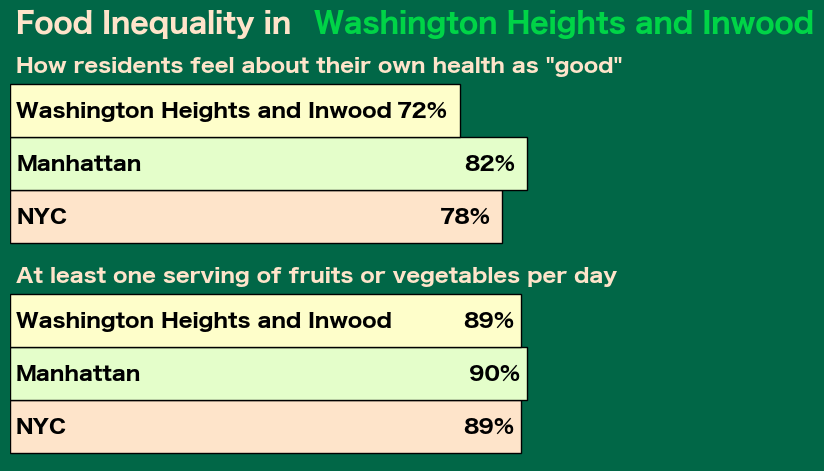

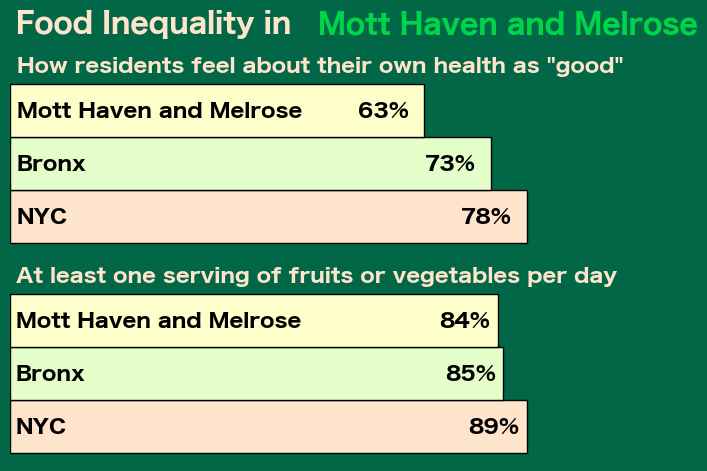

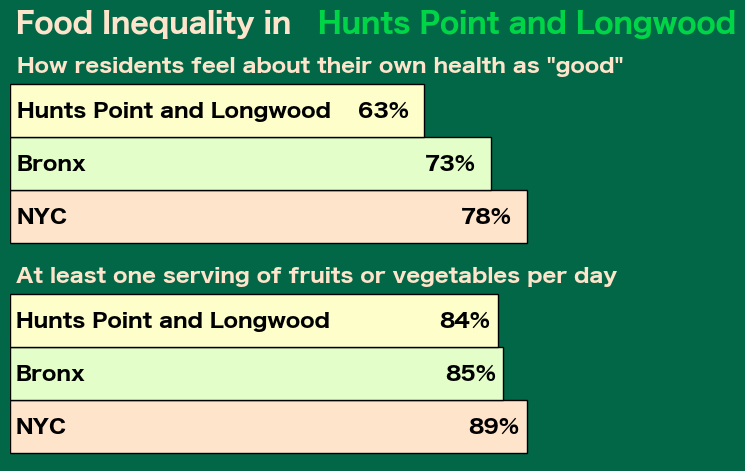

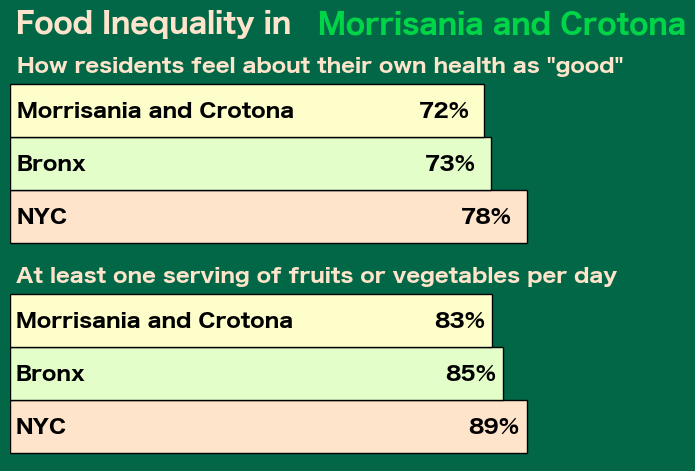

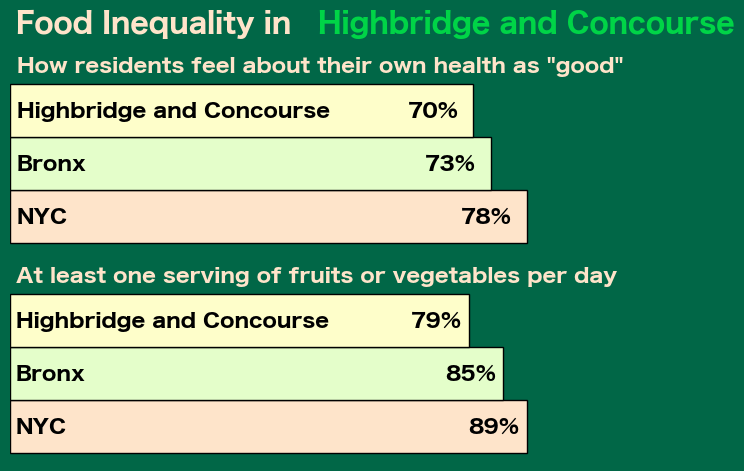

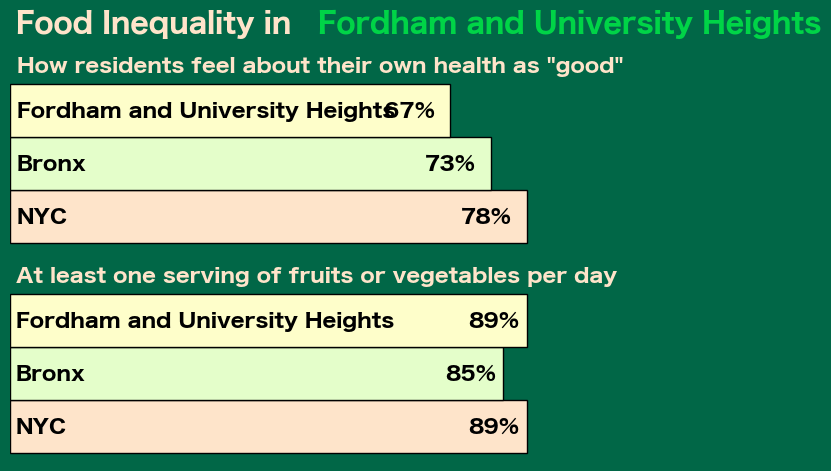

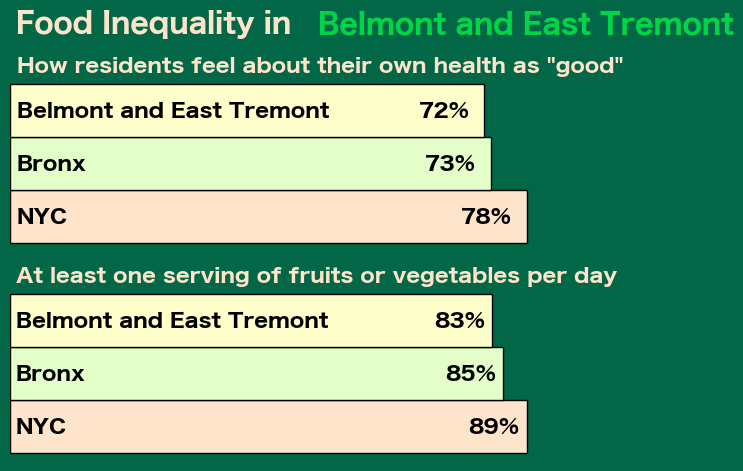

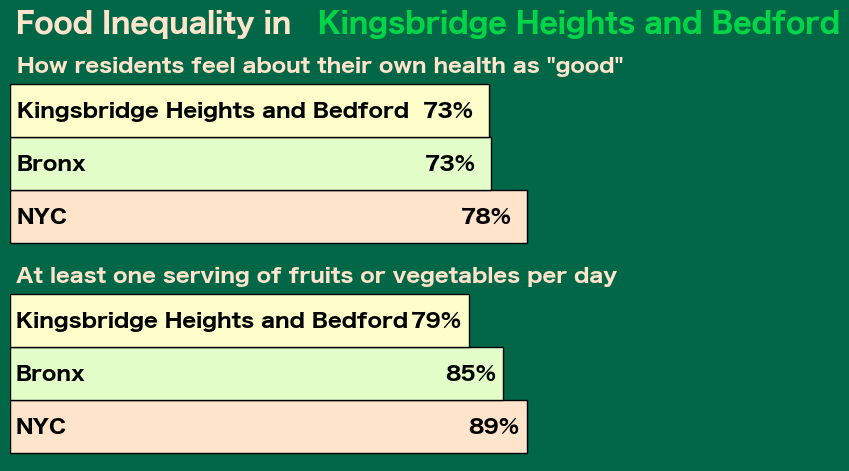

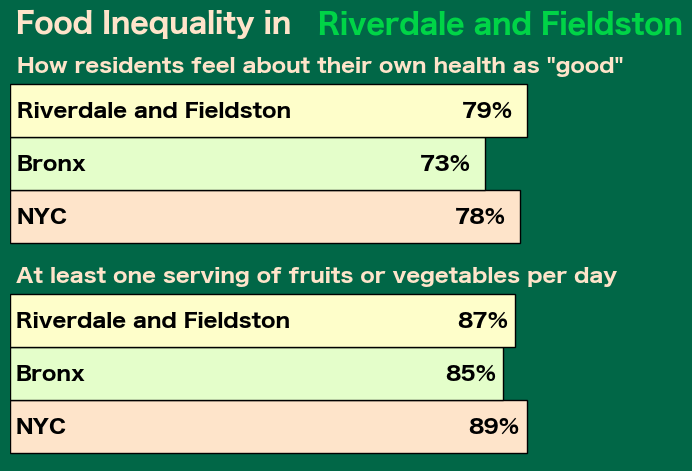

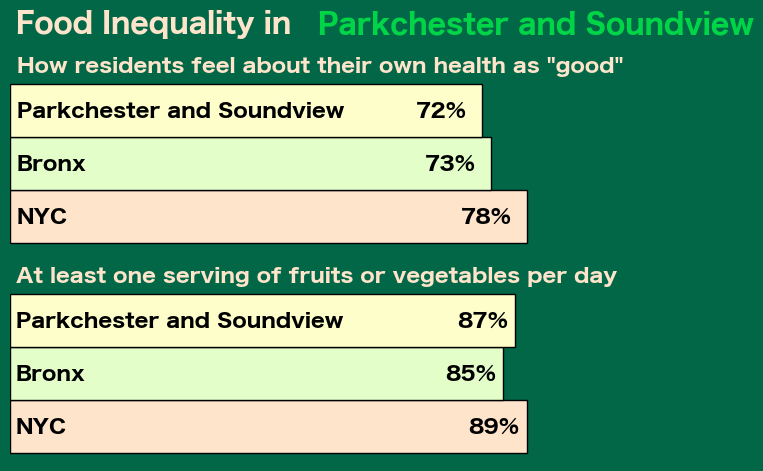

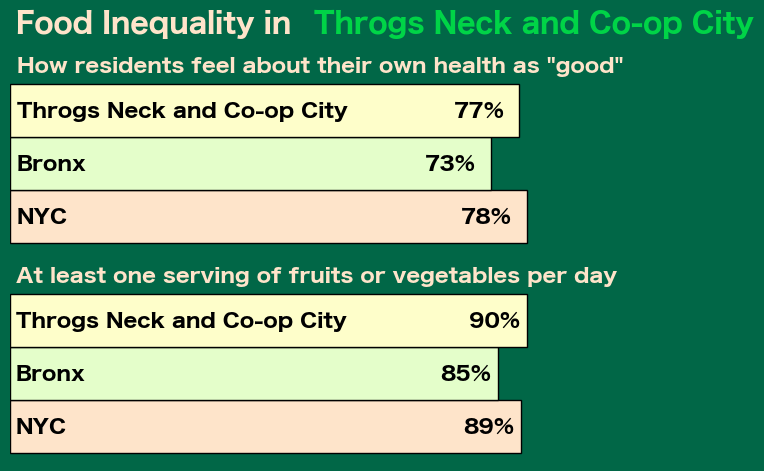

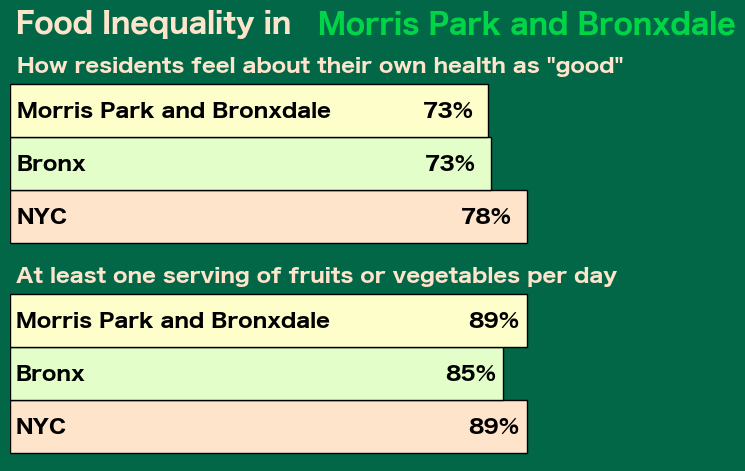

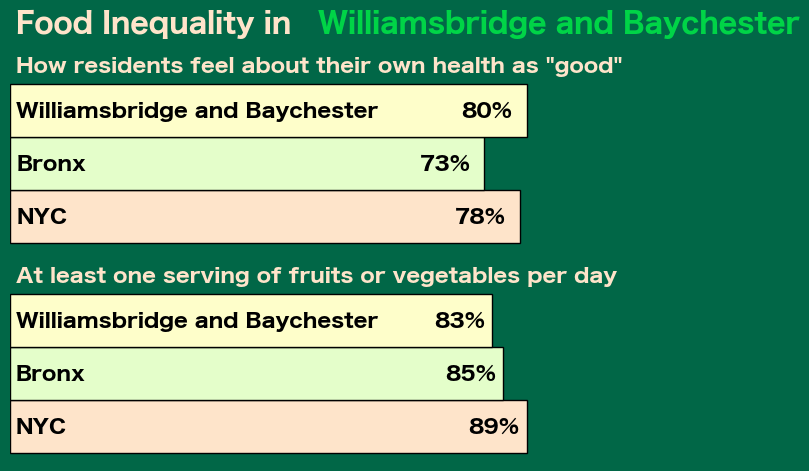

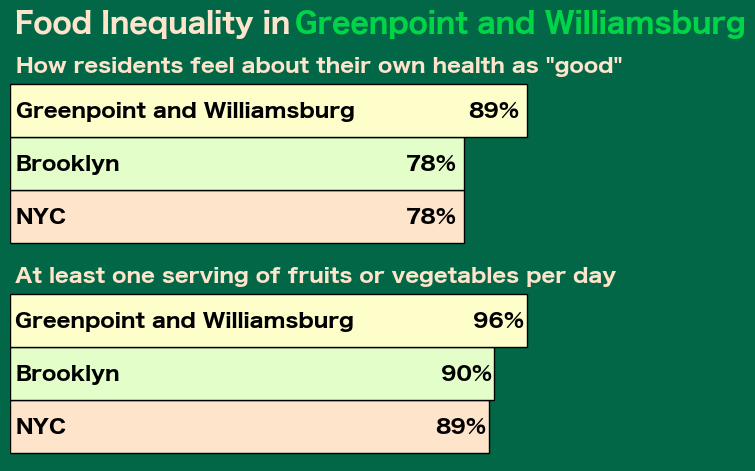

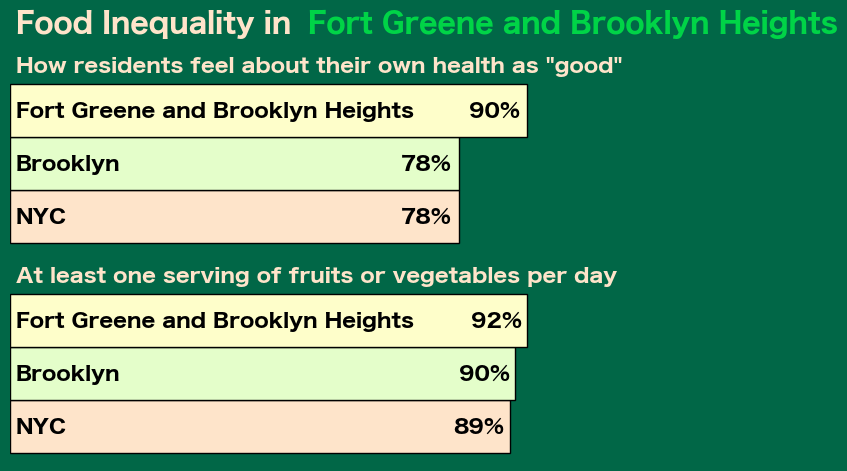

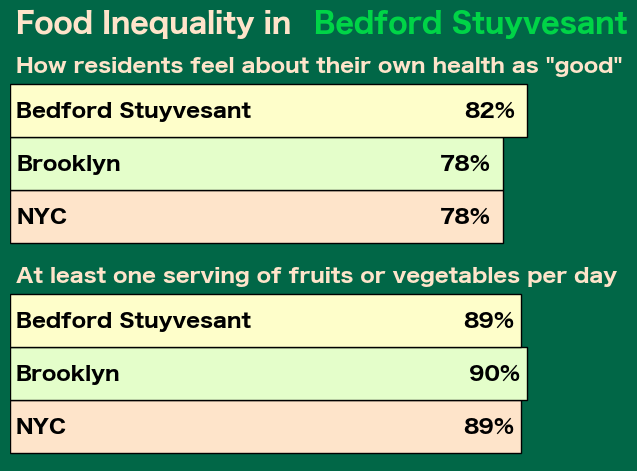

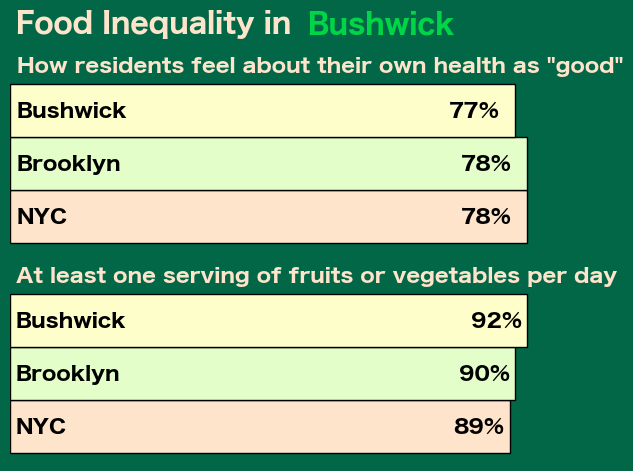

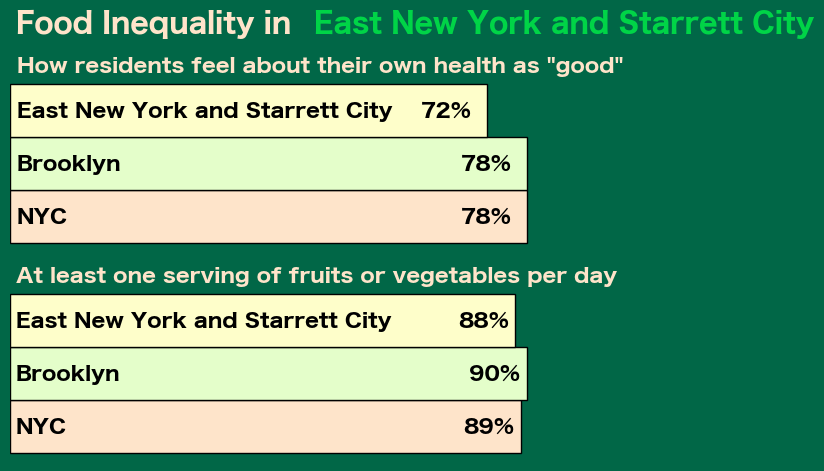

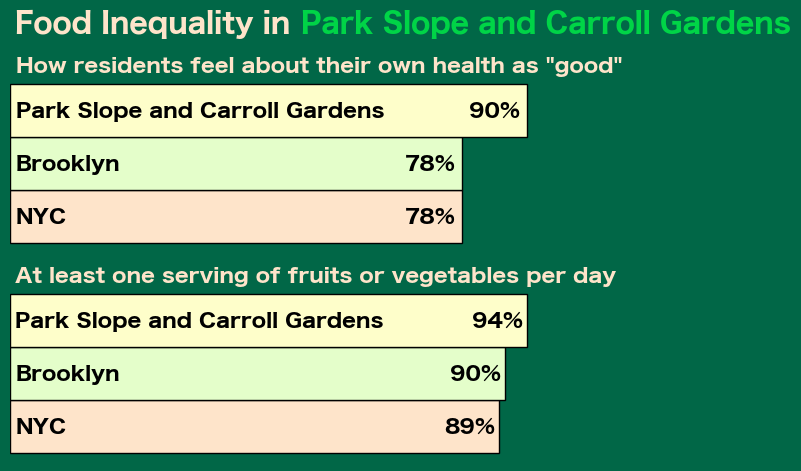

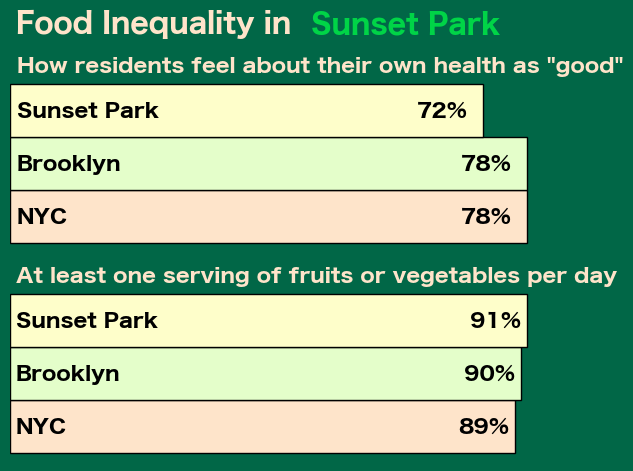

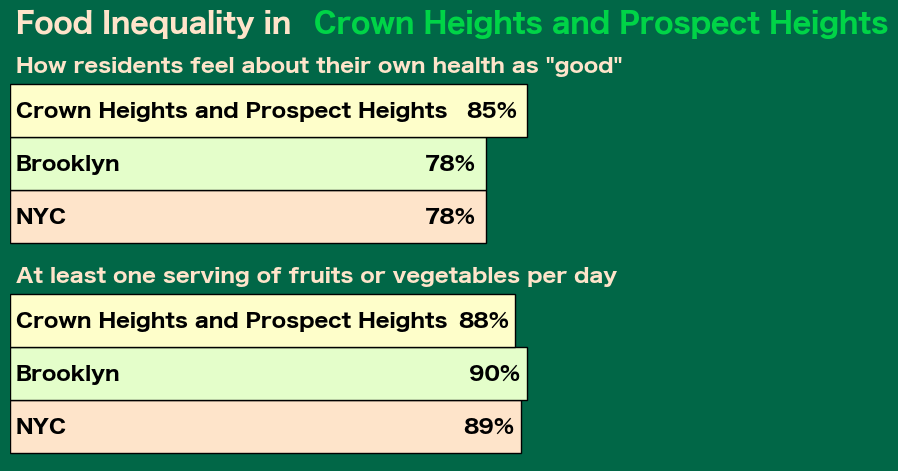

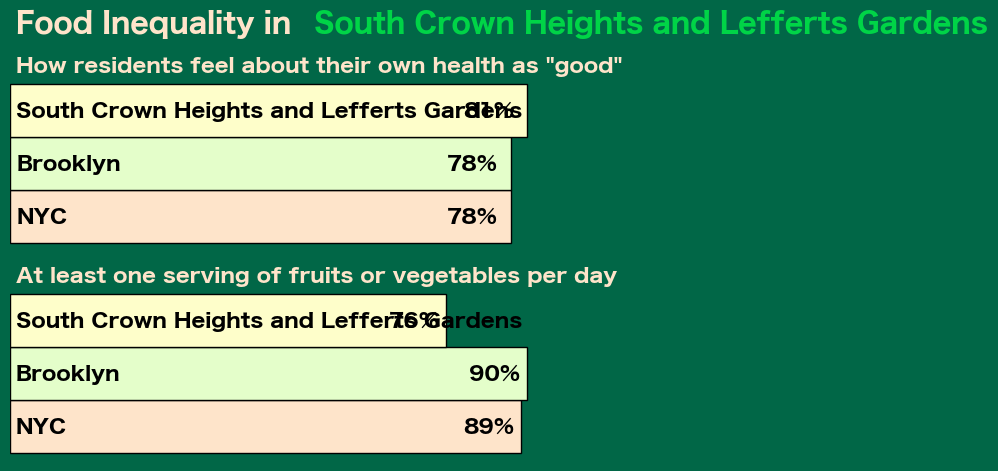

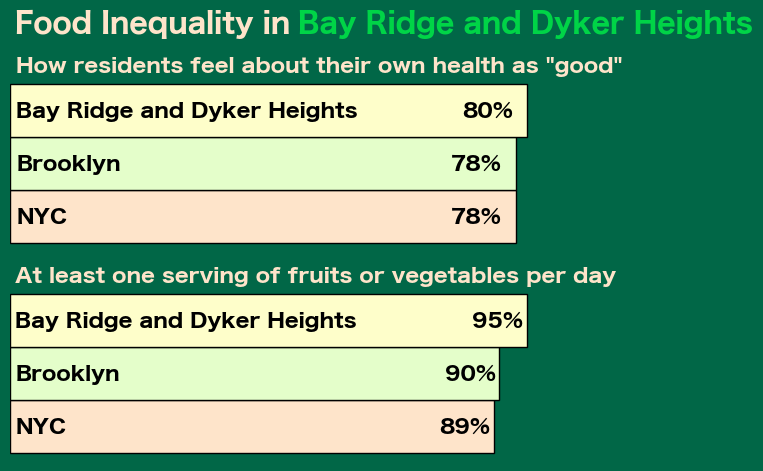

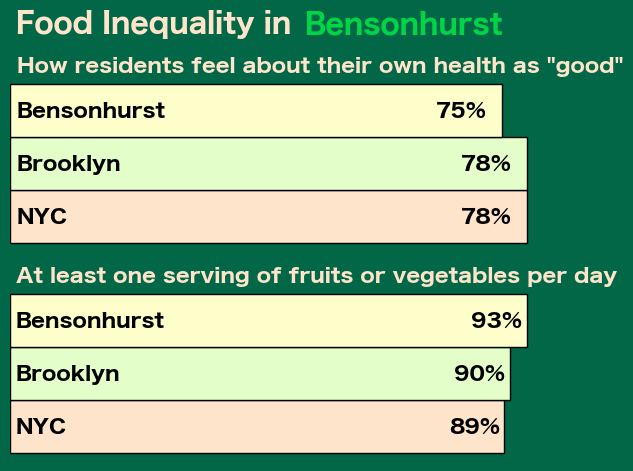

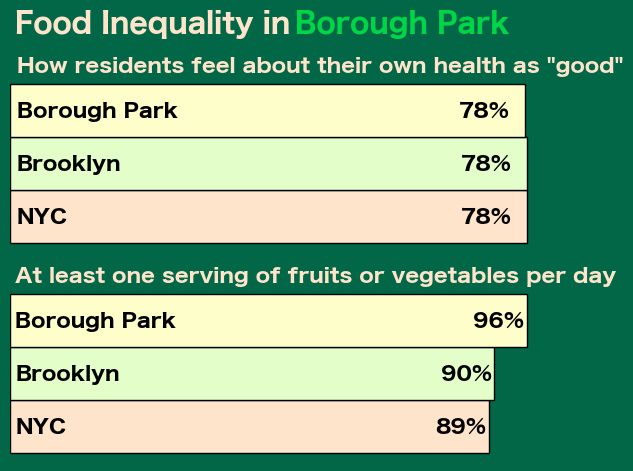

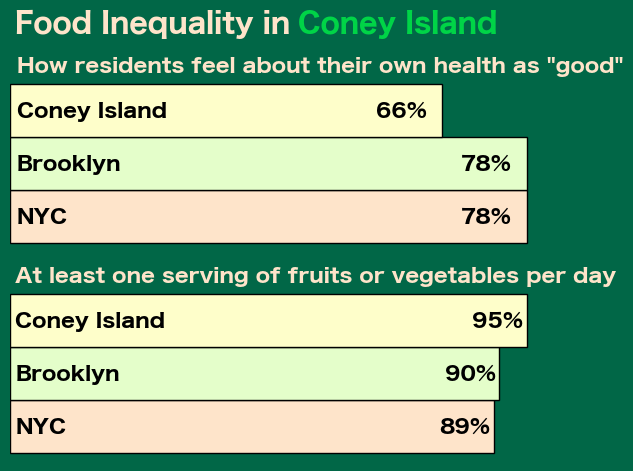

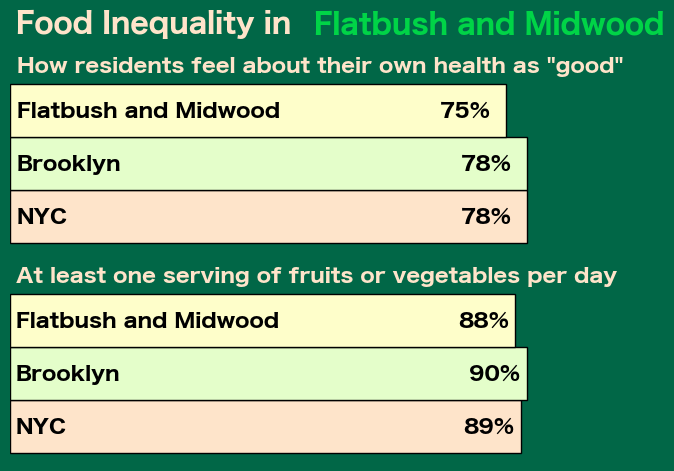

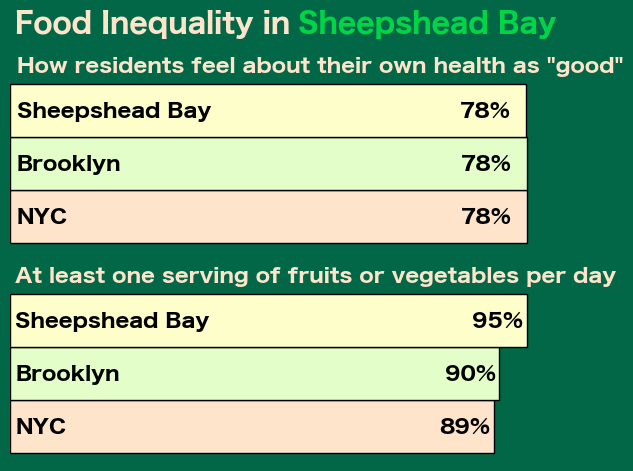

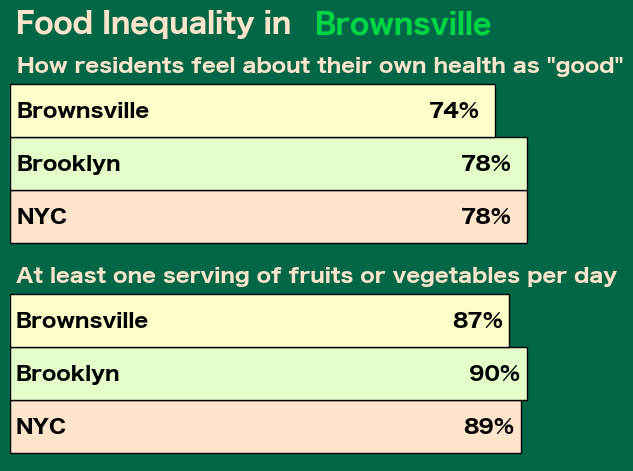

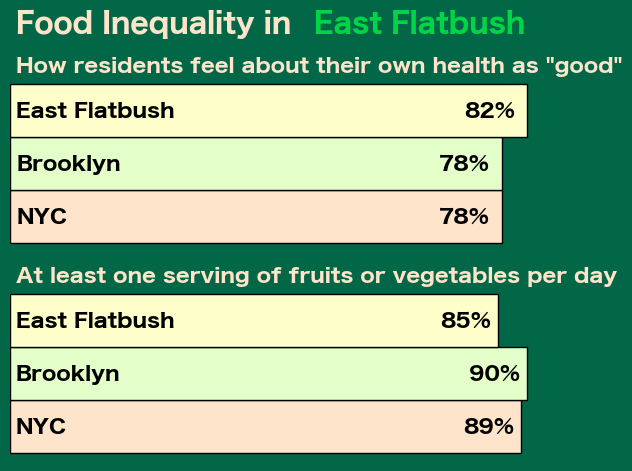

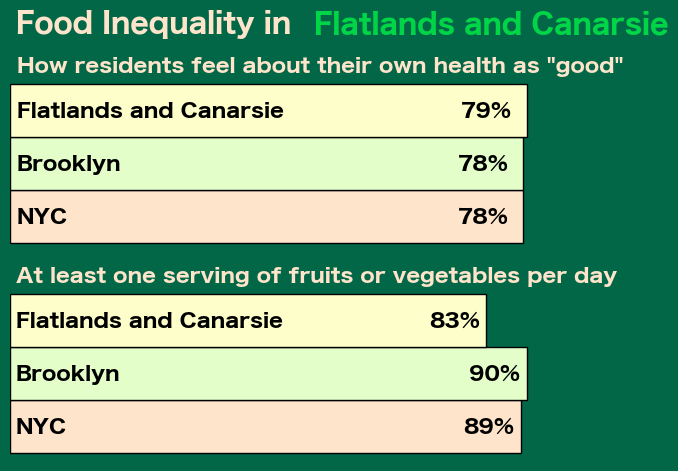

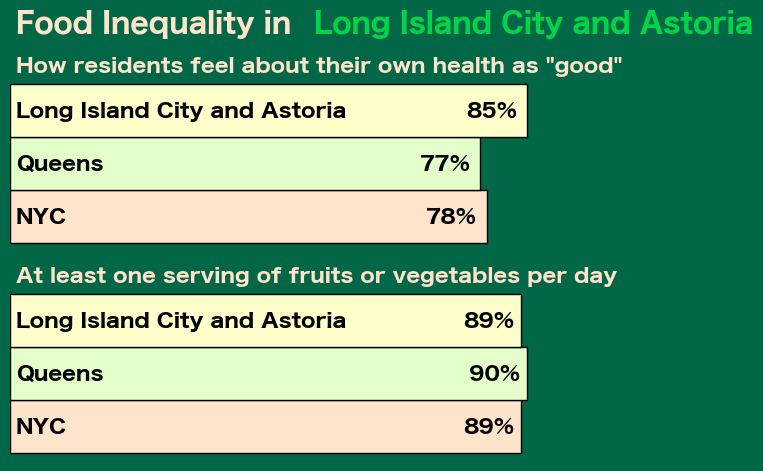

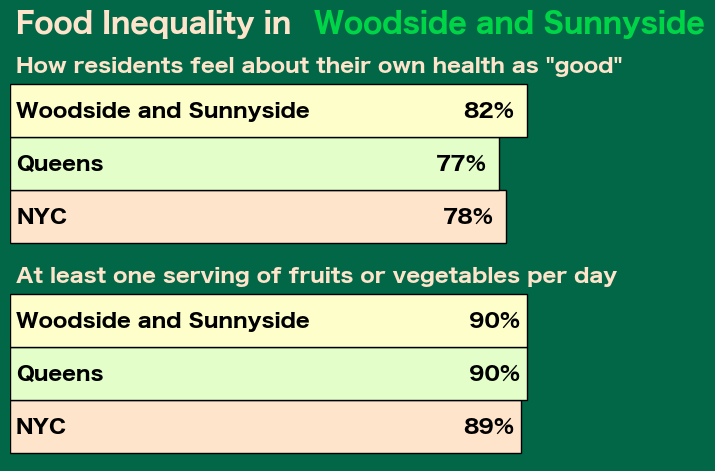

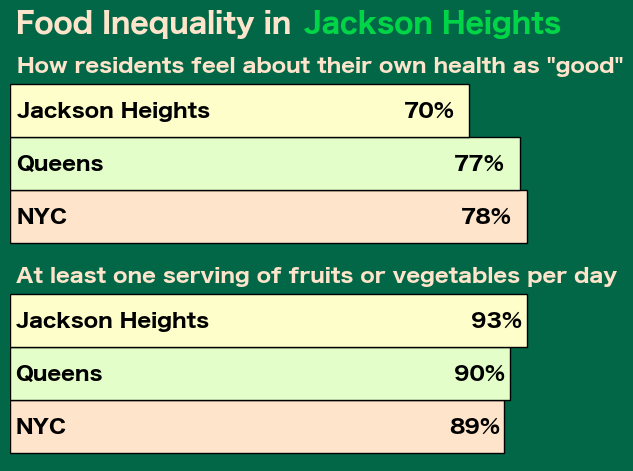

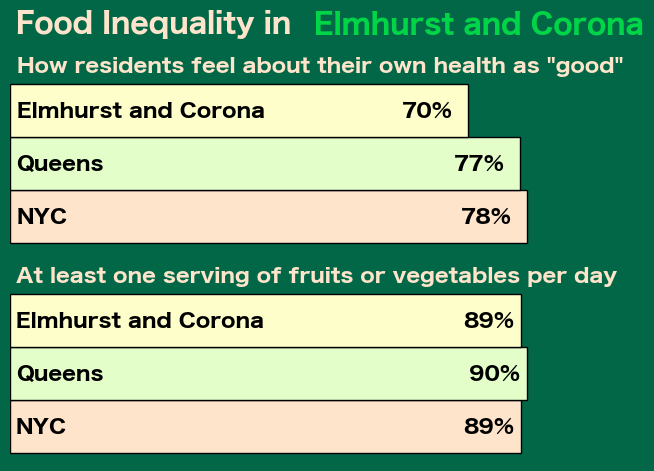

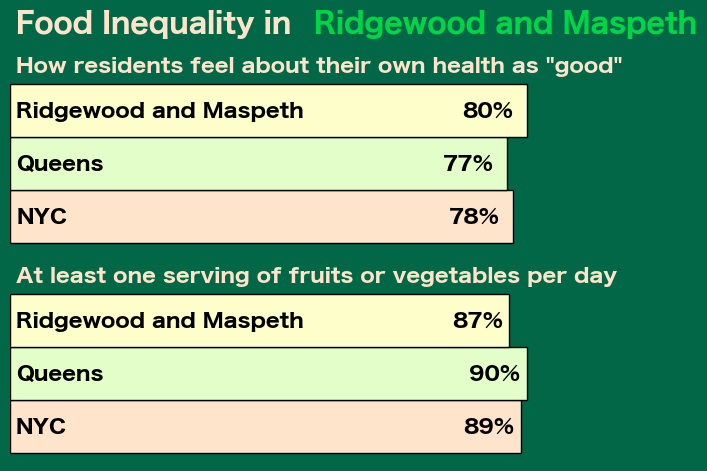

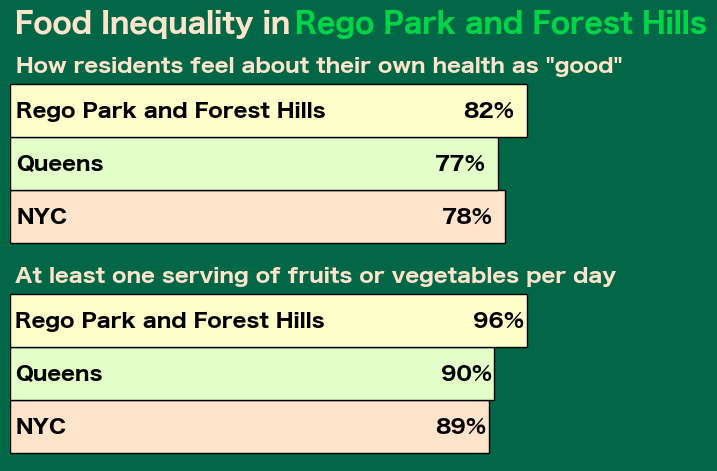

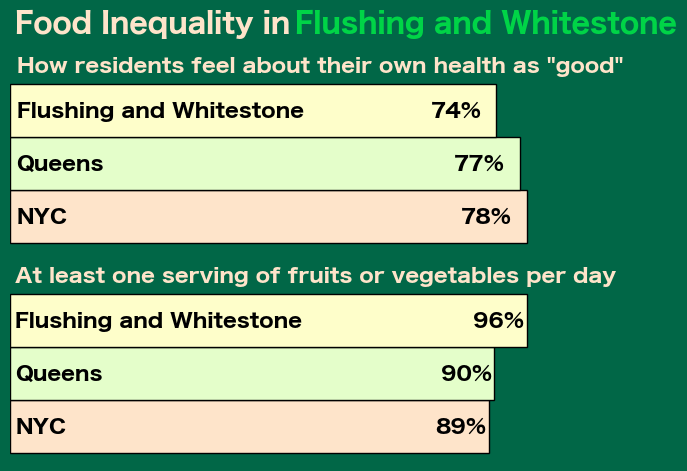

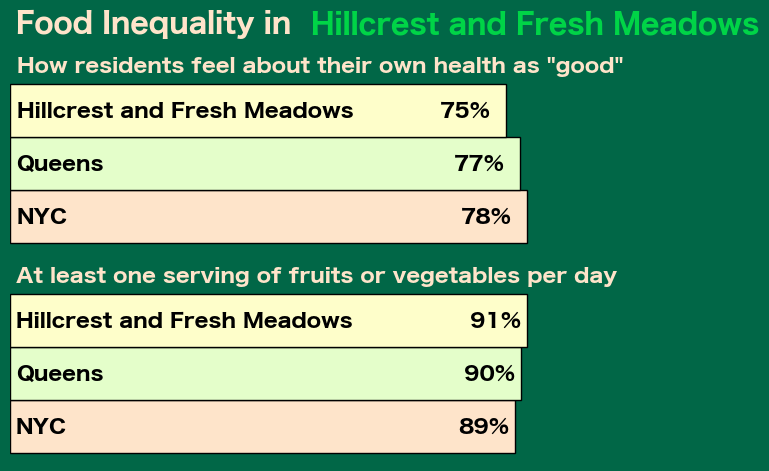

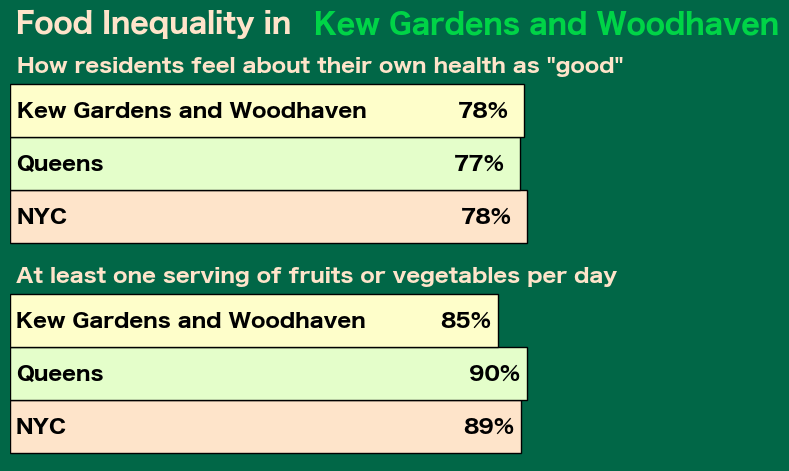

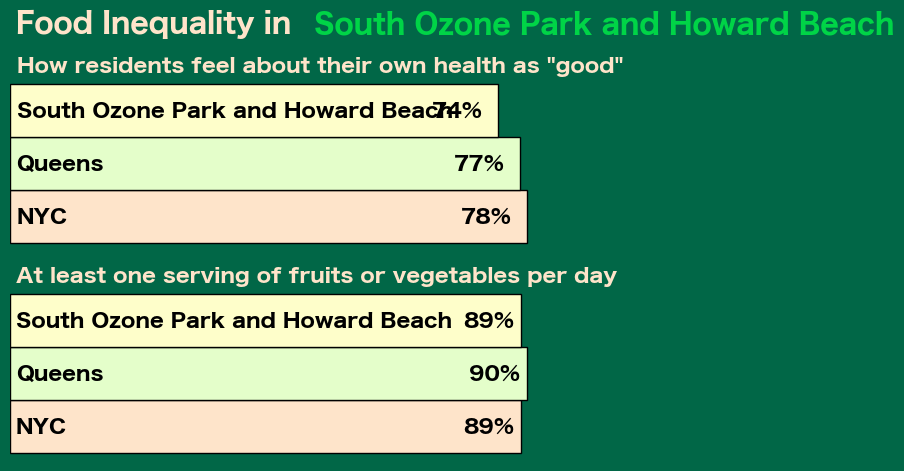

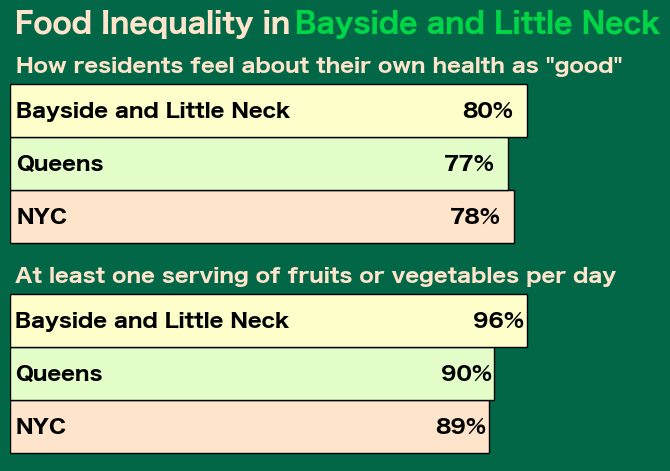

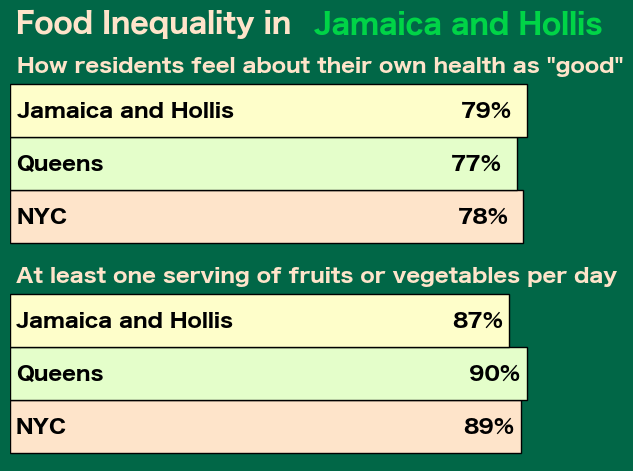

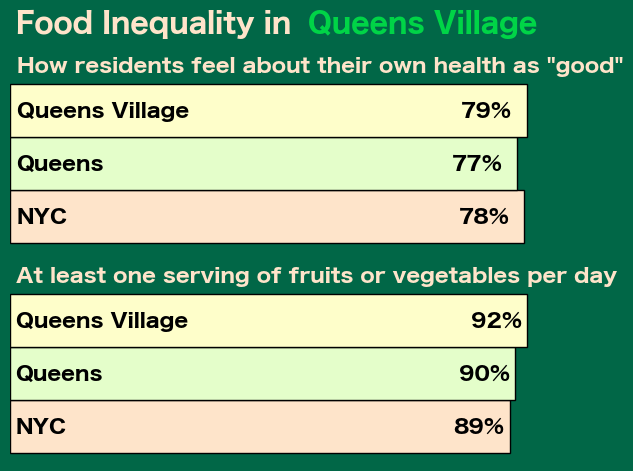

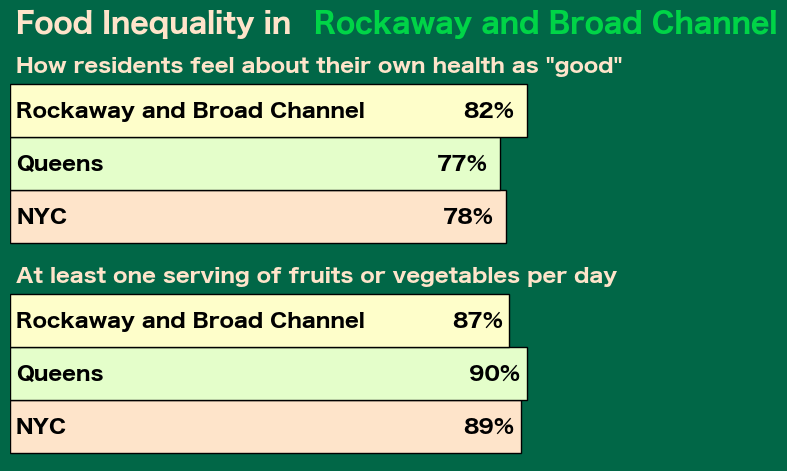

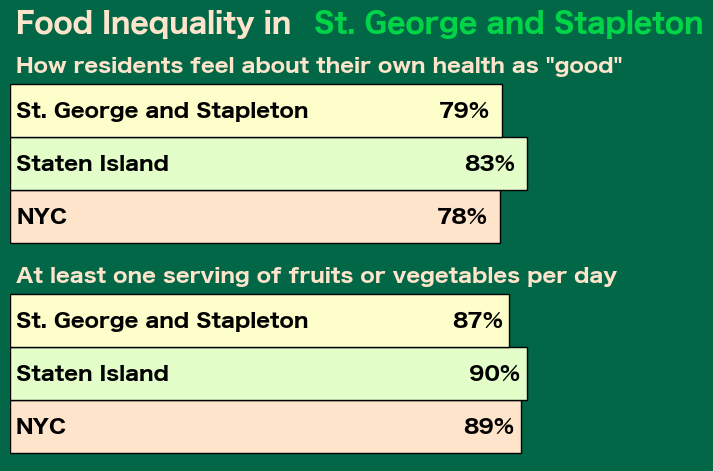

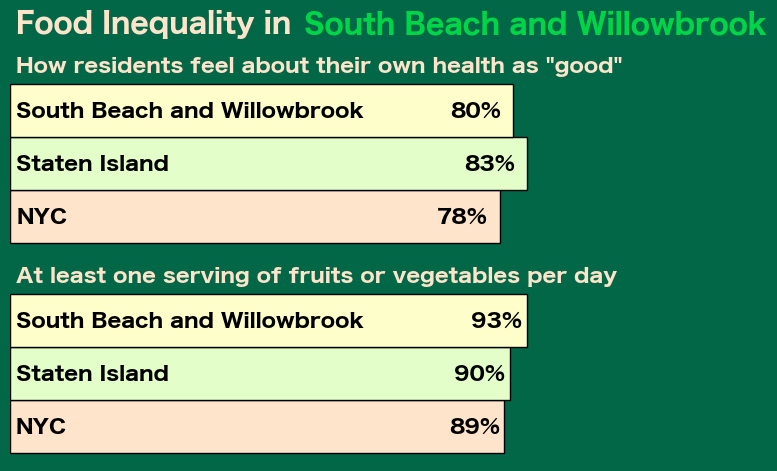

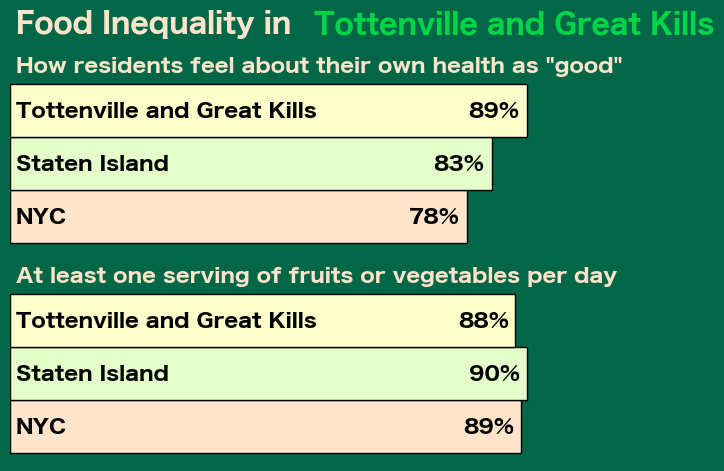

In [18]:
options = ["Manhattan:	Greenwich Village and Soho","Manhattan:	Lower East Side and Chinatown","Manhattan:	Clinton and Chelsea","Manhattan:	Midtown","Manhattan:	Stuyvesant Town and Turtle Bay","Manhattan:	Upper West Side","Manhattan:	Upper East Side","Manhattan:	Morningside Heights and Hamilton Heights","Manhattan:	Central Harlem","Manhattan:	East Harlem","Manhattan:	Washington Heights and Inwood","Bronx:	Mott Haven and Melrose","Bronx:	Hunts Point and Longwood","Bronx:	Morrisania and Crotona","Bronx:	Highbridge and Concourse","Bronx:	Fordham and University Heights","Bronx:	Belmont and East Tremont","Bronx:	Kingsbridge Heights and Bedford","Bronx:	Riverdale and Fieldston","Bronx:	Parkchester and Soundview","Bronx:	Throgs Neck and Co-op City","Bronx:	Morris Park and Bronxdale","Bronx:	Williamsbridge and Baychester","Brooklyn:	Greenpoint and Williamsburg","Brooklyn:	Fort Greene and Brooklyn Heights","Brooklyn:	Bedford Stuyvesant","Brooklyn:	Bushwick","Brooklyn:	East New York and Starrett City","Brooklyn:	Park Slope and Carroll Gardens","Brooklyn:	Sunset Park","Brooklyn:	Crown Heights and Prospect Heights","Brooklyn:	South Crown Heights and Lefferts Gardens","Brooklyn:	Bay Ridge and Dyker Heights","Brooklyn:	Bensonhurst","Brooklyn:	Borough Park","Brooklyn:	Coney Island","Brooklyn:	Flatbush and Midwood","Brooklyn:	Sheepshead Bay","Brooklyn:	Brownsville","Brooklyn:	East Flatbush","Brooklyn:	Flatlands and Canarsie","Queens:	Long Island City and Astoria","Queens:	Woodside and Sunnyside","Queens:	Jackson Heights","Queens:	Elmhurst and Corona","Queens:	Ridgewood and Maspeth","Queens:	Rego Park and Forest Hills","Queens:	Flushing and Whitestone","Queens:	Hillcrest and Fresh Meadows","Queens:	Kew Gardens and Woodhaven","Queens:	South Ozone Park and Howard Beach","Queens:	Bayside and Little Neck","Queens:	Jamaica and Hollis","Queens: Queens Village","Queens:	Rockaway and Broad Channel","Staten Island:	St. George and Stapleton","Staten Island:	South Beach and Willowbrook","Staten Island:	Tottenville and Great Kills"]
for option in options:
    name = option.split(":")[1][1:]
    print(name)
    vis.plot_inequality(community_info, borough_info, district_name = name)